## TCC Ciência de Dados e Big Data

#### ANÁLISE PREDITIVA DE INDICADORES DE DESEMPENHO DE PERIÓDICOS ACADÊMICOS

Ednilson Gesseff

Belo Horizonte

2022

In [137]:
# Data and Math libs
import pandas as pd
import numpy as np

# graphics libs
import matplotlib.pyplot as plt

# set magic command to matplotlib
%matplotlib inline

In [4]:
# %pip install xlrd
# %pip install pyxlsb

### Coleta de Dados

Acesse: https://www.scopus.com/sources

Clique em "Download Scopus Source List"

* Fonte 1: selecione "source titles only"

* Fonte 2: selecine "source titles and metrics"


Leitura do arquivo Excel formato xlsx e lista de planilhas

In [5]:
%%time
xl_file = pd.ExcelFile('data/ext_list_March_2022.xlsx', engine='openpyxl')
print(xl_file.sheet_names)
xl_file.close()

['Scopus Sources October 2021', 'Accepted titles Mar. 2022', 'Discontinued titles Mar. 2022', 'Serial Conf. Proc. with profile', 'All Conf. Proceedings', 'More info Medline', 'ASJC classification codes']
CPU times: user 9.55 s, sys: 87.5 ms, total: 9.64 s
Wall time: 9.67 s


Vamos utilizar a planilha "Scopus Sources October 2021" que contém os dados de identificação dos periódicos

In [6]:
%%time
scopus = pd.read_excel('data/ext_list_March_2022.xlsx', engine="openpyxl", 
                       sheet_name='Scopus Sources October 2021')

CPU times: user 27.3 s, sys: 91.7 ms, total: 27.4 s
Wall time: 27.4 s


In [10]:
scopus.shape

(42473, 54)

In [11]:
scopus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42473 entries, 0 to 42472
Data columns (total 54 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   Sourcerecord ID                                                 42473 non-null  int64  
 1   Source Title (Medline-sourced journals are indicated in Green)  42473 non-null  object 
 2   Print-ISSN                                                      39351 non-null  object 
 3   E-ISSN                                                          16386 non-null  object 
 4   Active or Inactive                                              42473 non-null  object 
 5   Coverage                                                        42473 non-null  object 
 6   Titles discontinued by Scopus due to quality issues             712 non-null    object 
 7   Article language in source (three-letter ISO lang

In [138]:
scopus[:1:].head().T

0
Sourcerecord ID                                                                           21101021140
Source Title (Medline-sourced journals are indi...  1700-tal: Nordic Journal for Eighteenth-Centur...
Print-ISSN                                                                                   16524772
E-ISSN                                                                                       20019866
Active or Inactive                                                                             Active
Coverage                                                                                 2019-ongoing
Titles discontinued by Scopus due to quality is...                                                NaN
Article language in source (three-letter ISO la...                                        DAN;ENG;GER
2019\nCiteScore                                                                                   NaN
2020\nCiteScore                                                                                     0
Medline-sourced Title? (see more info under sep...                                                NaN
Open Access status, i.e., registered in DOAJ. S...                                   DOAJ Open Access
Articles in Press included?                                                                       NaN
Added to list October 2021                                                                        NaN
Source Type                                                                                   Journal
Title history indication                                                                          NaN
Related title to title history indication                                                         NaN
Other related title 1                                                                             NaN
Other related title 2                                                                             NaN
Other related title 3                                                                             NaN
Publisher's Name                                       Swedish Society for Eighteenth-Century Studies
Publisher imprints grouped to main Publisher           Swedish Society for Eighteenth-Century Studies
All Science Journal Classification Codes (ASJC)                                    1213; 1202; 3316; 
Top level:\n\nLife Sciences                                                                       NaN
Top level:\n\nSocial Sciences                                                         Social Sciences
Top level:\n\nPhysical Sciences                                                                   NaN
Top level:\n\nHealth Sciences                                                                     NaN
1000 \nGeneral                                                                                    NaN
1100\nAgricultural and Biological Sciences                                                        NaN
1200\nArts and Humanities                                                         Arts and Humanities
1300\nBiochemistry, Genetics and Molecular Biology                                                NaN
1400\nBusiness, Management and Accounting                                                         NaN
1500\nChemical Engineering                                                                        NaN
1600\nChemistry                                                                                   NaN
1700\nComputer Science                                                                            NaN
1800\nDecision Sciences                                                                           NaN
1900\nEarth and Planetary Sciences                                                                NaN
2000\nEconomics, Econometrics and Finance                                                         NaN
2100\nEnergy                                                                                      NaN
2200\nEngineering   

In [13]:
scopus.columns

Index(['Sourcerecord ID',
       'Source Title (Medline-sourced journals are indicated in Green)',
       'Print-ISSN', 'E-ISSN', 'Active or Inactive', 'Coverage',
       'Titles discontinued by Scopus due to quality issues',
       'Article language in source (three-letter ISO language codes)',
       '2019\nCiteScore', '2020\nCiteScore',
       'Medline-sourced Title? (see more info under separate tab)',
       'Open Access status, i.e., registered in DOAJ. Status May 2021\n',
       'Articles in Press included?', 'Added to list October 2021',
       'Source Type', 'Title history indication',
       'Related title to title history indication', 'Other related title 1',
       'Other related title 2', 'Other related title 3', 'Publisher's Name',
       'Publisher imprints grouped to main Publisher',
       'All Science Journal Classification Codes (ASJC)',
       'Top level:\n\nLife Sciences', 'Top level:\n\nSocial Sciences',
       'Top level:\n\nPhysical Sciences', 'Top level:\n\nHea

#### Construção do DataFrame de trabalho

Construção do DataFrame de trabalho selecionando os atributos necessários, descartando aqueles não relevantea para esta análise e simplificando seus nomes.

In [14]:
field_names_map = {
    'Sourcerecord ID': 'source_id',
    'Source Title (Medline-sourced journals are indicated in Green)': 'journal',
    'Print-ISSN': 'print_issn', 
    'E-ISSN': 'e_issn', 
    'Active or Inactive': 'status',
    'Coverage': 'coverage',
    'Open Access status, i.e., registered in DOAJ. Status May 2021\n': 'open_access',
    'Source Type':'type',
    'Publisher\'s Name': 'publisher'
}

dfw = scopus[list(field_names_map.keys())].rename(columns=field_names_map)
dfw

source_id                                            journal  \
0      21101021140  1700-tal: Nordic Journal for Eighteenth-Centur...   
1      18500162600                                 21st Century Music   
2      21100404576                                       2D Materials   
3      21100447128                                          3 Biotech   
4      21100779062             3D Printing and Additive Manufacturing   
...            ...                                                ...   
42468        24168                                                ZWR   
42469        28883                                              Zygon   
42470        19073                                             Zygote   
42471        28135                    Zywienie Czlowieka i Metabolizm   
42472  19700173167  Zywnosc. Nauka. Technologia. Jakosc/Food. Scie...   

      print_issn    e_issn    status            coverage       open_access  \
0       16524772  20019866    Active        2019-ongoing  DOAJ Open Access   
1       15343219       NaN  Inactive           2002-2011               NaN   
2            NaN  20531583    Active        2014-ongoing               NaN   
3       2190572X  21905738    Active  2014-ongoing, 2012               NaN   
4       23297662  23297670    Active        2014-ongoing               NaN   
...          ...       ...       ...                 ...               ...   
42468   0044166X       NaN  Inactive           1970-1991               NaN   
42469   05912385  14679744    Active        1966-ongoing               NaN   
42470   09671994  14698730    Active        1993-ongoing               NaN   
42471   0209164X       NaN  Inactive     1992, 1984-1990               NaN   
42472   14256959       NaN    Active        2009-ongoing               NaN   

          type                                       publisher  
0      Journal  Swedish Society for Eighteenth-Century Studies  
1      Journal                      Cambridge University Press  
2      Journal           Institute of Physics Publishing (IOP)  
3      Journal            Springer International Publishing AG  
4      Journal                           Mary Ann Liebert Inc.  
...        ...                                             ...  
42468  Journal                                          Hüthig  
42469  Journal                       Blackwell Publishing Inc.  
42470  Journal                      Cambridge University Press  
42471  Journal           National Food and Nutrition Institute  
42472  Journal            Polish Society of Food Technologists  

[42473 rows x 9 columns]

In [15]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42473 entries, 0 to 42472
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source_id    42473 non-null  int64 
 1   journal      42473 non-null  object
 2   print_issn   39351 non-null  object
 3   e_issn       16386 non-null  object
 4   status       42473 non-null  object
 5   coverage     42473 non-null  object
 6   open_access  5639 non-null   object
 7   type         42473 non-null  object
 8   publisher    42396 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.9+ MB


#### Type

O atributo Type indica o tipo de fonte de dados de acordo com a lista abaixo.

* Journal

* Book Series

* Trade Journal

Serão analisados somente periódicos não comerciais (Type = j) e comerciais (Type = d). Os demais tipos serão descartados da análise.

In [16]:
dfw.groupby('type')[['type']].count()

type
type                
Book Series     1738
Book Series       36
Journal        39864
Trade Journal    833
Trade journal      2

In [17]:
dfw['type'].unique()

array(['Journal', 'Book Series', 'Trade Journal', 'Book Series ',
       'Trade journal'], dtype=object)

In [18]:
# Transformar em minúsculo e remover espaços
dfw['type'] = dfw['type'].str.strip()
dfw['type'] = dfw['type'].str.lower()
dfw['type'].unique()

array(['journal', 'book series', 'trade journal'], dtype=object)

In [19]:
dfw.groupby('type')[['type']].count()

type
type                
book series     1774
journal        39864
trade journal    835

#### Periódicos Ativos e Inativos
##### Active or Inactive
Representa se o periódico está ativo ou inativo. Vamos analisar e filtrar somente os ativos. Status=Active

In [20]:
dfw.groupby(['type', 'status'])[['journal']].count()

journal
type          status           
book series   Active        996
              Inactive      778
journal       Active      25814
              Inactive    14050
trade journal Active        247
              Inactive      588

In [21]:
dfw.groupby('status')[['status']].count()

status
status          
Active     27057
Inactive   15416

#### Open Access
Os periódicos cobertos pelo Scopus são indicados como Open Access se o periódico estiver listado no Directory of Open Access Journals (DOAJ) e/ou no Directory of Open Access Scholarly Resources (ROAD).


In [22]:
dfw['open_access'].unique()

array(['DOAJ Open Access', nan], dtype=object)

In [23]:
dfw.groupby(['type', 'open_access'])[['journal']].count()

journal
type          open_access              
book series   DOAJ Open Access       40
journal       DOAJ Open Access     5589
trade journal DOAJ Open Access       10

O método count() não leva em conta objetos tipo NaN.

Vamos preencher tipo NaN com valor zero e normalizar com o método get_dummies.

In [24]:
dfw['open_access'] = dfw['open_access'].fillna(0)

In [25]:
dfw['open_access'] = pd.get_dummies(dfw['open_access'])

In [26]:
dfw.groupby(['type', 'open_access'])[['journal']].count()

journal
type          open_access         
book series   0                 40
              1               1734
journal       0               5589
              1              34275
trade journal 0                 10
              1                825

### Filtragem por tipo e status do periódico
Vamos filtrar os periódicos de tipo "journal" ou "trade journal" e status "Active" para produzir o DataFrame principal

In [27]:
# Filtragem por type e status
dfw = dfw[
    ((dfw['type'] == 'journal') | (dfw['type'] == 'trade journal')) & \
    (dfw['status'] == 'Active')]

In [141]:
dfw[:1:].T

0
source_id                                          21101021140
journal      1700-tal: Nordic Journal for Eighteenth-Centur...
print_issn                                            16524772
e_issn                                                20019866
status                                                  Active
coverage                                          2019-ongoing
open_access                                                  0
type                                                   journal
publisher       Swedish Society for Eighteenth-Century Studies

Devido a características históricas e editoriais que os periódicos apresentam a pré-filtragem subtraiu ~38,6% do dataset que reduziu de 42.473 para 26.061 registros.

### Exportação dos dados para preparo do Dataframe de Principal
Exporta o DataFrame principal para posterior leitura via script.

In [29]:
dfw.to_csv("data/dataframe_main.csv", index=False)

#### Coleta da série de 10 anos de métricas de desempenho

Pré-análise da planilha de métricas

In [30]:
%%time
metrics = pd.read_excel('data/CiteScore-2011-2020-new-methodology-October-2021.xlsb', engine="pyxlsb", 
                       sheet_name='CiteScore 2020')

CPU times: user 6.92 s, sys: 36.5 ms, total: 6.95 s
Wall time: 6.95 s


Verificação dos nomes dos atributos e sua tipagem

In [31]:
metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59344 entries, 0 to 59343
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Scopus Source ID                     59344 non-null  int64  
 1   Title                                59344 non-null  object 
 2   Citation Count                       59344 non-null  int64  
 3   Scholarly Output                     59344 non-null  int64  
 4   Percent Cited                        59344 non-null  int64  
 5   CiteScore 2020                       59344 non-null  float64
 6   SNIP                                 59344 non-null  float64
 7   SJR                                  59344 non-null  float64
 8   Scopus ASJC Code (Sub-subject Area)  59344 non-null  int64  
 9   Scopus Sub-Subject Area              59344 non-null  object 
 10  Percentile                           59344 non-null  int64  
 11  RANK                        

Verificação do total de linhas e colunas

In [32]:
metrics.T

0      \
Scopus Source ID                                                                12001   
Title                                Journal of the Experimental Analysis of Behavior   
Citation Count                                                                    774   
Scholarly Output                                                                  247   
Percent Cited                                                                      74   
CiteScore 2020                                                                    3.1   
SNIP                                                                            1.104   
SJR                                                                              0.75   
Scopus ASJC Code (Sub-subject Area)                                              3205   
Scopus Sub-Subject Area                         Experimental and Cognitive Psychology   
Percentile                                                                         55   
RANK                                                                               66   
Rank Out Of                                                                       148   
Publisher                                                             Wiley-Blackwell   
Type                                                                                j   
Open Access                                                                        NO   
Quartile                                                                            2   
Top 10% (CiteScore Percentile)                                                  False   
URL Scopus Source ID                            https://www.scopus.com/sourceid/12001   
Print ISSN                                                                     225002   
E-ISSN                                                                       19383711   

                                                                                1      \
Scopus Source ID                                                                12001   
Title                                Journal of the Experimental Analysis of Behavior   
Citation Count                                                                    774   
Scholarly Output                                                                  247   
Percent Cited                                                                      74   
CiteScore 2020                                                                    3.1   
SNIP                                                                            1.104   
SJR                                                                              0.75   
Scopus ASJC Code (Sub-subject Area)                                              2802   
Scopus Sub-Subject Area                                       Behavioral Neuroscience   
Percentile                                                                         33   
RANK                                                                               52   
Rank Out Of                                                                        78   
Publisher                                                             Wiley-Blackwell   
Type                                                                                j   
Open Access                                                                        NO   
Quartile                                                                            3   
Top 10% (CiteScore Percentile)                                                  False   
URL Scopus Source ID                            https://www.scopus.com/sourceid/12001   
Print ISSN                                                                     225002   
E-ISSN                                                                       19383711   

                                                                                 2      \
Scopus Source ID                                                        

##### Remoção de linhas duplicadas
A planilha de métricas também traz indicadores de performance de acordo com o campo de assunto dos periódicos nos atributos "Scopus ASJC Code (Sub-subject Area)", "Percentile" e "Rank" fornecendo uma linha para cada assunto e  repetindo assim o mesmo CiteScore em cada linha. 
Como não será avaliado o desempenho por assunto vamos remover essa linhas "duplicadas" informando o atributo "Scopus Source ID" que é chave única do periódico na base Scopus.

In [33]:
# Contagem de dados
metrics.count()

Scopus Source ID                       59344
Title                                  59344
Citation Count                         59344
Scholarly Output                       59344
Percent Cited                          59344
CiteScore 2020                         59344
SNIP                                   59344
SJR                                    59344
Scopus ASJC Code (Sub-subject Area)    59344
Scopus Sub-Subject Area                59344
Percentile                             59344
RANK                                   59344
Rank Out Of                            59344
Publisher                              59344
Type                                   59344
Open Access                            59344
Quartile                               59344
Top 10% (CiteScore Percentile)         59344
URL Scopus Source ID                   59344
Print ISSN                             53650
E-ISSN                                 41294
dtype: int64

In [34]:
# Contagem única (sem duplicados) 
metrics.nunique()

Scopus Source ID                       25990
Title                                  25966
Citation Count                          5132
Scholarly Output                        2238
Percent Cited                            101
CiteScore 2020                           346
SNIP                                    3214
SJR                                     2877
Scopus ASJC Code (Sub-subject Area)      332
Scopus Sub-Subject Area                  332
Percentile                               100
RANK                                    1257
Rank Out Of                              233
Publisher                               7065
Type                                       4
Open Access                                4
Quartile                                   4
Top 10% (CiteScore Percentile)             2
URL Scopus Source ID                   25990
Print ISSN                             23845
E-ISSN                                 17567
dtype: int64

In [35]:
# Remoção de duplicados
metrics = metrics.drop_duplicates(subset='Scopus Source ID', keep='first')

In [36]:
metrics

Scopus Source ID                                              Title  \
0                 12001   Journal of the Experimental Analysis of Behavior   
2                 12002  Journal of the History of the Behavioral Sciences   
4                 12004                 Journal of Trauma and Dissociation   
6                 12005                        Journal of Traumatic Stress   
8                 12006                     Journal of Vocational Behavior   
...                 ...                                                ...   
59330       21101041510        Journal of Behavioral and Cognitive Therapy   
59333       21101041511          Journal of Holistic Nursing and Midwifery   
59337       21101041512                           Medicine in Microecology   
59341       21101041552               Clinical and Experimental Pediatrics   
59343       21101041622                  Journal of Mycology and Infection   

       Citation Count  Scholarly Output  Percent Cited  CiteScore 2020   SNIP  \
0                 774               247             74             3.1  1.104   
2                  58                63             43             0.9  1.215   
4                 517               151             73             3.4  1.058   
6                1456               379             70             3.8  1.351   
8                3253               385             87             8.4  2.800   
...               ...               ...            ...             ...    ...   
59330              37                62             34             0.6  0.143   
59333              29                88             27             0.3  0.000   
59337               1                 8             13             0.1  0.000   
59341             779               245             80             3.2  1.146   
59343              15                47             19             0.3  0.057   

         SJR  Scopus ASJC Code (Sub-subject Area)  \
0      0.750                                 3205   
2      0.216                                 1202   
4      0.703                                 3203   
6      1.259                                 3203   
8      2.607                                 3304   
...      ...                                  ...   
59330  0.000                                 3203   
59333  0.000                                 2913   
59337  0.000                                 2715   
59341  0.000                                 2919   
59343  0.000                                 2725   

                     Scopus Sub-Subject Area  ...  RANK  Rank Out Of  \
0      Experimental and Cognitive Psychology  ...    66          148   
2                                    History  ...   183         1328   
4                        Clinical Psychology  ...    81          283   
6                        Clinical Psychology  ...    70          283   
8                                  Education  ...    17         1319   
...                                      ...  ...   ...          ...   
59330                    Clinical Psychology  ...   224          283   
59333                Maternity and Midwifery  ...    18           26   
59337                       Gastroenterology  ...   120          136   
59341                             Pediatrics  ...     3           24   
59343                    Infectious Diseases  ...   256          288   

                                   Publisher Type Open Access Quartile  \
0                            Wiley-Blackwell    j          NO        2   
2                            Wiley-Blackwell    j          NO        1   
4                           Taylor & Francis    j          NO        2   
6                            Wiley-Blackwell    j          NO        1   
8                                   Elsevier    j          NO        1   
...                                      ...  ...         ...      ...   
59330                               Elsevier    j          NO        4   
593

In [37]:
metrics.shape

(25990, 21)

Neste passo vamos percorrer as 10 planilhas para coletar os indicadores e juntá-los ao DataFrame principal.
#### Execução do script merge_sheets.py
Para garantir um desempenho nesta atividade vamos executar um script Python com chamada ao terminal de comandos para obter o resultado da coleta e junção da série de indicadores.


O código deste script está disponível no repositório deste projeto: https://gitlab.com/ednilson/puc_minas_tcc/-/blob/main/merge_sheets.py

#### Atribuição dos indicadores ao DataFrame principal

In [38]:
%%time
!python merge_sheets.py

CiteScore 2011
rows, cols: (26061, 9)
rows, cols: (26061, 10)
CiteScore 2012
rows, cols: (26061, 10)
rows, cols: (26061, 11)
CiteScore 2013
rows, cols: (26061, 11)
rows, cols: (26061, 12)
CiteScore 2014
rows, cols: (26061, 12)
rows, cols: (26061, 13)
CiteScore 2015
rows, cols: (26061, 13)
rows, cols: (26061, 14)
CiteScore 2016
rows, cols: (26061, 14)
rows, cols: (26061, 15)
CiteScore 2017
rows, cols: (26061, 15)
rows, cols: (26061, 16)
CiteScore 2018
rows, cols: (26061, 16)
rows, cols: (26061, 17)
CiteScore 2019
rows, cols: (26061, 17)
rows, cols: (26061, 18)
CiteScore 2020
rows, cols: (26061, 18)
rows, cols: (26061, 19)
CPU times: user 1.48 s, sys: 255 ms, total: 1.74 s
Wall time: 1min 28s


### Carga dos resultados após merge de indicadores ao DataFrame principal

In [39]:
df = pd.read_csv('data/dataframe_merge_results.csv')
df

source_id                                            journal  \
0      21101021140  1700-tal: Nordic Journal for Eighteenth-Centur...   
1      21100404576                                       2D Materials   
2      21100447128                                          3 Biotech   
3      21100779062             3D Printing and Additive Manufacturing   
4      21100932761                            3D Printing in Medicine   
...            ...                                                ...   
26056        24017  ZWF Zeitschrift fuer Wirtschaftlichen Fabrikbe...   
26057  21100317006                                         Zwingliana   
26058        28883                                              Zygon   
26059        19073                                             Zygote   
26060  19700173167  Zywnosc. Nauka. Technologia. Jakosc/Food. Scie...   

      print_issn    e_issn  status                  coverage  open_access  \
0       16524772  20019866  Active              2019-ongoing            0   
1            NaN  20531583  Active              2014-ongoing            1   
2       2190572X  21905738  Active        2014-ongoing, 2012            1   
3       23297662  23297670  Active              2014-ongoing            1   
4            NaN  23656271  Active              2019-ongoing            0   
...          ...       ...     ...                       ...          ...   
26056   09470085       NaN  Active              1995-ongoing            1   
26057   02544407       NaN  Active  2013-ongoing, 2002, 1981            1   
26058   05912385  14679744  Active              1966-ongoing            1   
26059   09671994  14698730  Active              1993-ongoing            1   
26060   14256959       NaN  Active              2009-ongoing            1   

          type                                       publisher  2011  2012  \
0      journal  Swedish Society for Eighteenth-Century Studies   NaN   NaN   
1      journal           Institute of Physics Publishing (IOP)   NaN   NaN   
2      journal            Springer International Publishing AG   NaN   NaN   
3      journal                           Mary Ann Liebert Inc.   NaN   NaN   
4      journal                             BioMed Central Ltd.   NaN   NaN   
...        ...                                             ...   ...   ...   
26056  journal                          Walter de Gruyter GmbH   NaN   NaN   
26057  journal                     Theologischer Verlag Zurich   NaN   NaN   
26058  journal                       Blackwell Publishing Inc.   1.1   1.3   
26059  journal                      Cambridge University Press   2.1   1.9   
26060  journal            Polish Society of Food Technologists   0.1   0.3   

       2013  2014  2015  2016  2017  2018  2019  2020  
0       NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0  
1       NaN   0.9   2.9   4.7   7.2   9.9  12.2  13.9  
2       NaN   NaN   1.2   1.1   1.8   2.8   3.2   3.5  
3       NaN   NaN   NaN   2.3   4.1   4.6   5.5   6.8  
4       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
...     ...   ...   ...   ...   ...   ...   ...   ...  
26056   NaN   NaN   NaN   1.0   0.5   0.6   0.8   0.7  
26057   NaN   0.0   0.0   0.1   0.1   0.2   0.1   0.0  
26058   1.7   1.4   1.7   1.4   1.5   1.6   1.2   1.3  
26059   2.0   1.5   1.5   1.6   1.8   2.1   2.6   2.9  
26060   0.4   0.5   0.5   0.5   0.5   0.5   0.4   0.6  

[26061 rows x 19 columns]

Vamos criar uma constante "years" do tipo lista para armazenar a faixa de anos que serão analisados.

In [40]:
years = [str(y) for y in range(2011, 2021)]
print(years)

['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']


Vamos analisar os indicadores na faixa de anos em busca de valores omissos, zeros e outliers.

Inicialmente vamos visualizar um boxplot para analise das métricas de centralidade.

In [44]:
fig = df[years].boxplot(vert=True, figsize=(15, 9))
fig.set_title('Distribuição das métricas CiteScore por ano')
fig.set_xlabel('anos')
fig.set_ylabel('CiteScore');

In [47]:
df[years].describe().round(2)

2011      2012      2013      2014      2015      2016      2017  \
count  17337.00  18153.00  18809.00  19188.00  19628.00  20529.00  21735.00   
mean       2.12      2.19      2.29      2.33      2.43      2.48      2.53   
std        3.64      3.67      3.82      3.86      3.93      4.08      4.36   
min        0.00      0.00      0.00      0.00      0.00      0.00      0.00   
25%        0.40      0.40      0.40      0.50      0.50      0.50      0.50   
50%        1.20      1.20      1.30      1.30      1.40      1.40      1.50   
75%        2.70      2.80      2.90      3.00      3.10      3.20      3.20   
max      150.50    157.30    196.90    210.90    189.10    237.40    290.80   

           2018      2019      2020  
count  22770.00  23714.00  24911.00  
mean       2.55      2.64      2.85  
std        4.70      4.97      5.18  
min        0.00      0.00      0.00  
25%        0.50      0.50      0.60  
50%        1.50      1.50      1.70  
75%        3.30      3.40      3.70  
max      387.20    435.40    463.20

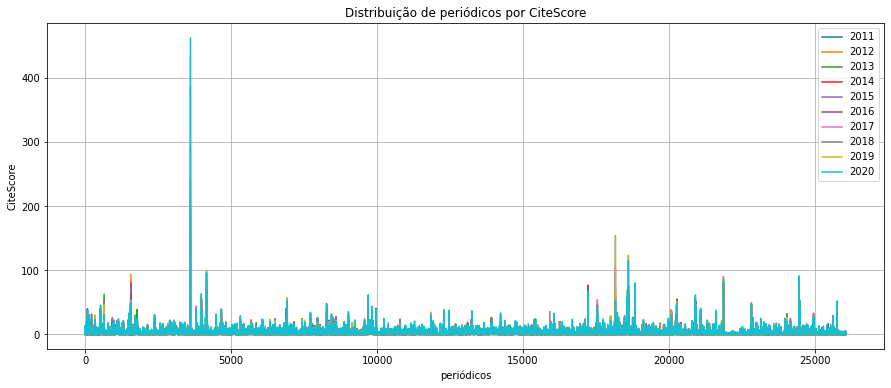

In [48]:
fig = df[years].plot.line(figsize=(15,6), grid=True);
fig.set_title("Distribuição de periódicos por CiteScore")
fig.set_ylabel("CiteScore")
fig.set_xlabel('periódicos');

### Outliers

#### Visualizando o conjunto de dados a partir do Q3

In [49]:
df[years].quantile([0.75, 0.8, 0.85, 0.9, 0.95, 1])

2011   2012   2013   2014   2015    2016   2017   2018   2019   2020
0.75    2.7    2.8    2.9    3.0    3.1    3.20    3.2    3.3    3.4    3.7
0.80    3.2    3.3    3.5    3.5    3.7    3.74    3.8    3.8    4.0    4.3
0.85    3.9    4.1    4.2    4.2    4.4    4.50    4.6    4.6    4.8    5.1
0.90    4.8    5.0    5.2    5.3    5.4    5.50    5.6    5.7    5.9    6.3
0.95    6.7    6.9    7.2    7.2    7.4    7.60    7.7    7.7    8.0    8.7
1.00  150.5  157.3  196.9  210.9  189.1  237.40  290.8  387.2  435.4  463.2

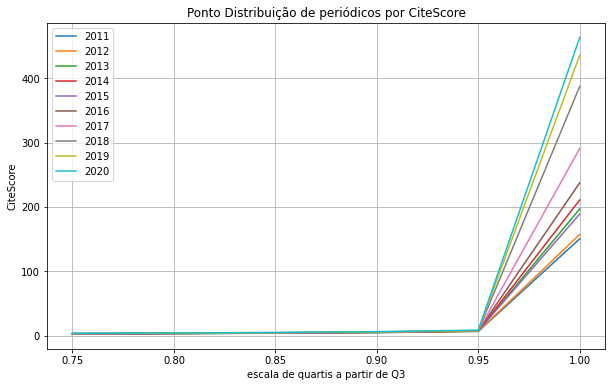

In [50]:
fig = df[years].quantile([0.75, 0.8, 0.85, 0.9, 0.95, 1]).plot.line(figsize=(10,6), grid=True);
fig.set_title("Ponto Distribuição de periódicos por CiteScore")
fig.set_ylabel("CiteScore")
fig.set_xlabel('escala de quartis a partir de Q3');

Nos dez anos de métricas de desempenho é notada a presença de periódicos com CiteScore a partir da 90º posĩção na escala de quartis

Grupo de histograma da distribuição de periódicos acima do 3º Quartil

/home/ednilson/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


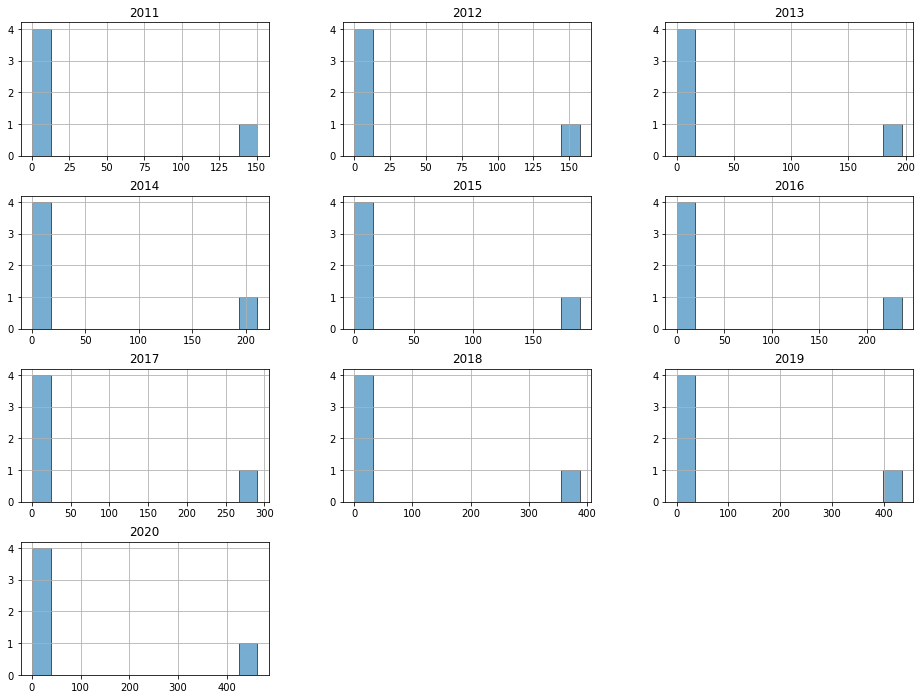

In [51]:
fig = df[years].quantile([0, 0.75, 0.8, 0.9, 1]).hist(figsize=(16,12), bins=12, ec="k", alpha=.6);

#### Lista dos periódicos de alto desempenho

Periódicos que obteve um CiteScore acima de 60 nos últimos 10 anos

In [52]:
index_list=[]
for y in years:
    index_list.extend(df[df[y] > 65].index.tolist())

In [53]:
index_list=list(set(index_list))
index_list.sort()

In [54]:
fields=['journal', 'open_access']
fields.extend(years)
h_perform = df.loc[index_list][fields]
h_perform

journal  open_access   2011  \
223    Acta Crystallographica Section A: Foundations ...            1  104.2   
1570                         Annual Review of Immunology            1   82.5   
3606                CA - A Cancer Journal for Clinicians            1  150.5   
4158                                    Chemical Reviews            1   56.3   
4161                            Chemical Society Reviews            1   38.1   
17220                       Living Reviews in Relativity            0   26.3   
18161                   MMWR Recommendations and Reports            1   75.1   
18163                        MMWR Surveillance Summaries            1   21.1   
18576                                      Nature Energy            1    NaN   
18584                                   Nature Materials            1   39.9   
18589                              Nature Nanotechnology            1   45.4   
18591                                   Nature Photonics            1   25.9   
18595                              Nature Reviews Cancer            1   31.3   
18604                            Nature Reviews Genetics            1   32.8   
18605                          Nature Reviews Immunology            1   31.6   
18606                           Nature Reviews Materials            1    NaN   
18608              Nature Reviews Molecular Cell Biology            1   36.0   
18833                    New England Journal of Medicine            1   56.0   
21862                          Reviews of Modern Physics            1   76.6   
24456                                         The Lancet            1   45.0   

        2012   2013   2014   2015   2016   2017   2018   2019   2020  
223      3.3    3.9    4.3    6.2    8.4   18.4   31.9    2.6    2.6  
1570    93.4   69.3   78.8   74.7   63.3   53.4   39.6   35.1   38.4  
3606   157.3  196.9  210.9  189.1  237.4  290.8  387.2  435.4  463.2  
4158    65.8   78.6   67.1   72.5   66.6   85.8   94.5  100.5   96.9  
4161    43.9   42.8   51.9   61.6   66.4   72.7   70.7   67.1   72.4  
17220   25.3   34.9   36.7   49.9   77.1   65.7   33.6   54.1   67.4  
18161   56.9   30.6   29.5   46.2   60.3  104.3  153.9  152.5   51.6  
18163    7.2   10.1   13.9   22.0   27.8   41.5   37.4   68.4   53.6  
18576    NaN    NaN    NaN    NaN    7.9   28.4   43.7   71.2   68.7  
18584   47.6   52.7   55.4   59.3   57.3   68.6   69.1   63.3   56.7  
18589   44.4   49.7   49.7   52.6   55.9   65.1   61.1   59.4   58.2  
18591   32.9   39.3   43.2   61.4   61.0   67.6   59.9   58.3   57.8  
18595   40.0   47.1   64.7   66.6   61.9   64.7   70.3   70.4   78.3  
18604   44.6   58.2   68.5   71.3   68.5   76.6   67.3   73.5   62.4  
18605   35.9   47.4   61.8   62.6   72.2   69.9   68.7   62.9   53.9  
18606    NaN    NaN    NaN    NaN    7.2   34.2   74.4  123.7  115.7  
18608   42.2   48.9   58.9   64.3   61.7   76.0   62.6   73.4   99.7  
18833   60.2   58.0   57.3   57.4   61.1   67.2   73.1   66.1   80.6  
21862   90.2   80.7   76.8   59.8   62.3   63.2   67.7   75.8   86.5  
24456   45.8   49.4   48.2   55.2   51.4   57.9   64.9   73.4   91.5

In [55]:
h_perform.shape

(20, 12)

In [56]:
print("Há {} periódicos com CiteScore acima de 65".format(h_perform.shape[0]))

Há 20 periódicos com CiteScore acima de 65


#### Atribuição de soma, média e desvio padrão

Essa atribuição é dada para uso posterior durante a seleção de dados

In [57]:
df = df.assign(sum = df[years].sum(axis=1).round(2), mean = df[years].mean(axis=1).round(2), std = df[years].std(axis=1, ddof=0).round(2))
df.T

0      \
source_id                                          21101021140   
journal      1700-tal: Nordic Journal for Eighteenth-Centur...   
print_issn                                            16524772   
e_issn                                                20019866   
status                                                  Active   
coverage                                          2019-ongoing   
open_access                                                  0   
type                                                   journal   
publisher       Swedish Society for Eighteenth-Century Studies   
2011                                                       NaN   
2012                                                       NaN   
2013                                                       NaN   
2014                                                       NaN   
2015                                                       NaN   
2016                                                       NaN   
2017                                                       NaN   
2018                                                       NaN   
2019                                                       NaN   
2020                                                         0   
sum                                                          0   
mean                                                         0   
std                                                          0   

                                             1      \
source_id                              21100404576   
journal                               2D Materials   
print_issn                                     NaN   
e_issn                                    20531583   
status                                      Active   
coverage                              2014-ongoing   
open_access                                      1   
type                                       journal   
publisher    Institute of Physics Publishing (IOP)   
2011                                           NaN   
2012                                           NaN   
2013                                           NaN   
2014                                           0.9   
2015                                           2.9   
2016                                           4.7   
2017                                           7.2   
2018                                           9.9   
2019                                          12.2   
2020                                          13.9   
sum                                           51.7   
mean                                          7.39   
std                                           4.49   

                                            2      \
source_id                             21100447128   
journal                                 3 Biotech   
print_issn                               2190572X   
e_issn                                   21905738   
status                                     Active   
coverage                       2014-ongoing, 2012   
open_access                                     1   
type                                      journal   
publisher    Springer International Publishing AG   
2011                                          NaN   
2012                                          NaN   
2013                                          NaN   
2014                                          NaN   
2015                                          1.2   
2016                                          1.1   
2017                                          1.8   
2018                                          2.8   
2019                                          3.2   
2020                                          3.5   
sum                                          13.6   
mean                                         2.27   
std                                          0.95   

                                              3                        4   

### Números de celulas vazias  ou igual a Zero

In [58]:
# O método pd.count() conta apenas registros non-NA.
# Precisamos verificar também quantos registros temos com CiteScore = 0  
df[years].count()

2011    17337
2012    18153
2013    18809
2014    19188
2015    19628
2016    20529
2017    21735
2018    22770
2019    23714
2020    24911
dtype: int64

In [59]:
# Count of NaN
nan_total = df[years].isnull().sum()
nan_total

2011    8724
2012    7908
2013    7252
2014    6873
2015    6433
2016    5532
2017    4326
2018    3291
2019    2347
2020    1150
dtype: int64

In [60]:
# Count of Zeros
zero_total = (df[years] == 0).sum()
zero_total

2011     917
2012     945
2013     929
2014     841
2015     851
2016     846
2017     953
2018    1058
2019    1092
2020     983
dtype: int64

In [61]:
df_zeros = pd.DataFrame({'total':df.shape[0], 'zeros_nan':nan_total + zero_total})
df_zeros

total  zeros_nan
2011  26061       9641
2012  26061       8853
2013  26061       8181
2014  26061       7714
2015  26061       7284
2016  26061       6378
2017  26061       5279
2018  26061       4349
2019  26061       3439
2020  26061       2133

In [62]:
df_zeros['valid'] = df_zeros['total']-df_zeros['zeros_nan']
df_zeros

total  zeros_nan  valid
2011  26061       9641  16420
2012  26061       8853  17208
2013  26061       8181  17880
2014  26061       7714  18347
2015  26061       7284  18777
2016  26061       6378  19683
2017  26061       5279  20782
2018  26061       4349  21712
2019  26061       3439  22622
2020  26061       2133  23928

In [63]:
df_zeros['percent_zeros_nan']=(df_zeros.zeros_nan/df_zeros.total)
df_zeros

total  zeros_nan  valid  percent_zeros_nan
2011  26061       9641  16420           0.369940
2012  26061       8853  17208           0.339703
2013  26061       8181  17880           0.313917
2014  26061       7714  18347           0.295998
2015  26061       7284  18777           0.279498
2016  26061       6378  19683           0.244734
2017  26061       5279  20782           0.202563
2018  26061       4349  21712           0.166878
2019  26061       3439  22622           0.131960
2020  26061       2133  23928           0.081846

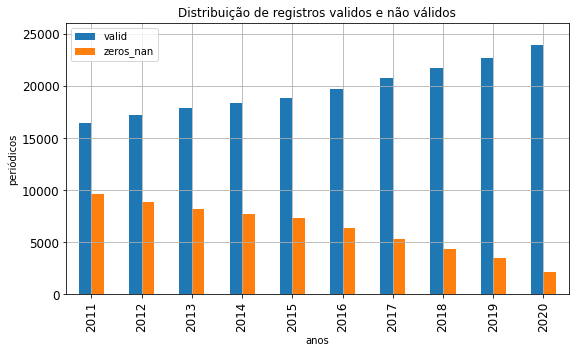

In [64]:
# Distribuição de registros validos x zeros_nan
plt.rcParams['figure.figsize'] = (9, 5)
ax = df_zeros[['valid', 'zeros_nan']].plot(
    kind='bar',
    title="Distribuição de registros validos e não válidos",
    fontsize=12,
    grid=True,
    ylim=(0,df.shape[0]))

ax.set_xlabel("anos")
ax.set_ylabel("periódicos");

No gráfico acima nota-se com o passar dos anos crescimento de periódicos com CiteScore e a diminuição sem indicador. Isso também pode representar a melhoria nos processos editoriais a fim de obter melhor desempenho e o reconhecimento pela comunidade de um bom veículo para comunicar ciência.

In [65]:
# Total de celulas
tt_cel = df.shape[0]*len(years)
tt_cel

260610

In [66]:
# Total de celulas com CiteScore (validas)
tt_val = (df.shape[0]*len(years)-(nan_total + zero_total).sum())
tt_val

197359

In [67]:
# Proporçao de celulas válidas
print("Proporção de celulas válidas: {}%".format(((tt_val/tt_cel)*100).round(1)))

Proporção de celulas válidas: 75.7%


Temos ~75% de celulas com CiteScore, o que pode representar uma proporção boa ao conjunto de dados.

No entanto, periódicos com CiteScore dos últimos 2 anos ou média igual a zero não tem chance de participar num processo de avaliação de ingresso ou permanencia num indexador por diversos motivos, como: 
* encerramento de atividade;
* desindexação por não crumprimento de critérios de indexação.

Para determinar o intervalos de tempo para calcular a taxa de crescimento anual vamos adotar o período de 5 anos tendo como base diversos fatores.

Geralmente uma janela de tempo de publicações mais longa indica mais estabilidade (menos flutuações), mas depende-se de dados de qualidade muito seletivos.

Uma maneira poderia ser classificar os periódicos por vários métodos e comparar os resultados.

Neste exercício vamos tentar prever o crescimento ou declínio do indicador CiteScore com base na sua evolução nos últimos 5 anos, sem a necessidade de correlacionar esta variável com outras do dataset, mesmo que isso seja possível, porém para analisar outros cenários. 

CiteScore:
A literatura bibliométrica revisada por pares mostra que uma janela de três anos é longa o suficiente para capturar o pico de citações para a maioria das disciplinas.
Em previsões quanto maior o número de variáveis de qualidade para prever cenários, melhor. 

No entanto, com base nos resultados e na observação do crescimento de periódicos com CiteScore computado optou-se pela janela dos últimos cinco anos, tornando assim o conjunto de dados mais robusto e estável.

Além disso, eliminamos a necessidade de imputar valores para dados omissos, evitando assim a distorção dos resultados que são baseados em dados (indicador CiteScore) computados, analisados e publicados com certo grau de critério e consistencia.

Vamos continuar com a análise da série de anos do CiteScore para filtrar esses periódicos afim de se obter o conjunto ideal para submissão a prediçao.

### Seleção de dados

Seleção de periódicos que possuem indicadores de 2016 a 2020 para calculo da taxa de crescimento nos últimos 5 anos e a variável alvo (target) para o modelo de predição.
Criaremos um atributo "selec" para posterior filtragem e criação de um novo conjunto.


In [68]:
df['selec'] = np.where((df['2016'] > 0) &\
                       (df['2017'] > 0) &\
                       (df['2018'] > 0) &\
                       (df['2019'] > 0) &\
                       (df['2020'] > 0) &\
                       (df['mean'] > 0)  , 1, 0)
    
df[:5:]

source_id                                            journal print_issn  \
0  21101021140  1700-tal: Nordic Journal for Eighteenth-Centur...   16524772   
1  21100404576                                       2D Materials        NaN   
2  21100447128                                          3 Biotech   2190572X   
3  21100779062             3D Printing and Additive Manufacturing   23297662   
4  21100932761                            3D Printing in Medicine        NaN   

     e_issn  status            coverage  open_access     type  \
0  20019866  Active        2019-ongoing            0  journal   
1  20531583  Active        2014-ongoing            1  journal   
2  21905738  Active  2014-ongoing, 2012            1  journal   
3  23297670  Active        2014-ongoing            1  journal   
4  23656271  Active        2019-ongoing            0  journal   

                                        publisher  2011  ...  2015  2016  \
0  Swedish Society for Eighteenth-Century Studies   NaN  ...   NaN   NaN   
1           Institute of Physics Publishing (IOP)   NaN  ...   2.9   4.7   
2            Springer International Publishing AG   NaN  ...   1.2   1.1   
3                           Mary Ann Liebert Inc.   NaN  ...   NaN   2.3   
4                             BioMed Central Ltd.   NaN  ...   NaN   NaN   

   2017  2018  2019  2020   sum  mean   std  selec  
0   NaN   NaN   NaN   0.0   0.0  0.00  0.00      0  
1   7.2   9.9  12.2  13.9  51.7  7.39  4.49      1  
2   1.8   2.8   3.2   3.5  13.6  2.27  0.95      1  
3   4.1   4.6   5.5   6.8  23.3  4.66  1.49      1  
4   NaN   NaN   NaN   NaN   0.0   NaN   NaN      0  

[5 rows x 23 columns]

In [69]:
print("Total de periódicos selecionados {} ".format(df['selec'].sum()))

Total de periódicos selecionados 19154 


#### Filtrando os selecionados para a conjunto de predição

Criação de um novo dataset resultante do filtro aplicado

In [70]:
# filtrando somente os eleitos para a predicao
selec = df[df['selec'] == 1].copy()
selec

source_id                                            journal  \
1      21100404576                                       2D Materials   
2      21100447128                                          3 Biotech   
3      21100779062             3D Printing and Additive Manufacturing   
5      21100229836                                        3D Research   
6      19700200922              3L: Language, Linguistics, Literature   
...            ...                                                ...   
26055  21100403905                                              Zutot   
26056        24017  ZWF Zeitschrift fuer Wirtschaftlichen Fabrikbe...   
26058        28883                                              Zygon   
26059        19073                                             Zygote   
26060  19700173167  Zywnosc. Nauka. Technologia. Jakosc/Food. Scie...   

      print_issn    e_issn  status                 coverage  open_access  \
1            NaN  20531583  Active             2014-ongoing            1   
2       2190572X  21905738  Active       2014-ongoing, 2012            1   
3       23297662  23297670  Active             2014-ongoing            1   
5            NaN  20926731  Active             2010-ongoing            1   
6       01285157       NaN  Active             2008-ongoing            0   
...          ...       ...     ...                      ...          ...   
26055   15717283  18750214  Active  2008-ongoing, 2001-2004            1   
26056   09470085       NaN  Active             1995-ongoing            1   
26058   05912385  14679744  Active             1966-ongoing            1   
26059   09671994  14698730  Active             1993-ongoing            1   
26060   14256959       NaN  Active             2009-ongoing            1   

          type                                publisher  2011  ...  2015  \
1      journal    Institute of Physics Publishing (IOP)   NaN  ...   2.9   
2      journal     Springer International Publishing AG   NaN  ...   1.2   
3      journal                    Mary Ann Liebert Inc.   NaN  ...   NaN   
5      journal        Springer Science + Business Media   2.5  ...   1.2   
6      journal  Penerbit Universiti Kebangsaan Malaysia   0.2  ...   0.9   
...        ...                                      ...   ...  ...   ...   
26055  journal                                    Brill   NaN  ...   0.0   
26056  journal                   Walter de Gruyter GmbH   NaN  ...   NaN   
26058  journal                Blackwell Publishing Inc.   1.1  ...   1.7   
26059  journal               Cambridge University Press   2.1  ...   1.5   
26060  journal     Polish Society of Food Technologists   0.1  ...   0.5   

       2016  2017  2018  2019  2020   sum  mean   std  selec  
1       4.7   7.2   9.9  12.2  13.9  51.7  7.39  4.49      1  
2       1.1   1.8   2.8   3.2   3.5  13.6  2.27  0.95      1  
3       2.3   4.1   4.6   5.5   6.8  23.3  4.66  1.49      1  
5       1.3   1.6   1.9   2.9   4.7  23.4  2.34  0.99      1  
6       0.8   0.8   0.8   1.3   2.0   8.4  0.84  0.49      1  
...     ...   ...   ...   ...   ...   ...   ...   ...    ...  
26055   0.1   0.2   0.1   0.2   0.1   0.7  0.12  0.07      1  
26056   1.0   0.5   0.6   0.8   0.7   3.6  0.72  0.17      1  
26058   1.4   1.5   1.6   1.2   1.3  14.2  1.42  0.19      1  
26059   1.6   1.8   2.1   2.6   2.9  20.0  2.00  0.44      1  
26060   0.5   0.5   0.5   0.4   0.6   4.3  0.43  0.13      1  

[19154 rows x 23 columns]

In [71]:
selec.reset_index()

index    source_id                                            journal  \
0          1  21100404576                                       2D Materials   
1          2  21100447128                                          3 Biotech   
2          3  21100779062             3D Printing and Additive Manufacturing   
3          5  21100229836                                        3D Research   
4          6  19700200922              3L: Language, Linguistics, Literature   
...      ...          ...                                                ...   
19149  26055  21100403905                                              Zutot   
19150  26056        24017  ZWF Zeitschrift fuer Wirtschaftlichen Fabrikbe...   
19151  26058        28883                                              Zygon   
19152  26059        19073                                             Zygote   
19153  26060  19700173167  Zywnosc. Nauka. Technologia. Jakosc/Food. Scie...   

      print_issn    e_issn  status                 coverage  open_access  \
0            NaN  20531583  Active             2014-ongoing            1   
1       2190572X  21905738  Active       2014-ongoing, 2012            1   
2       23297662  23297670  Active             2014-ongoing            1   
3            NaN  20926731  Active             2010-ongoing            1   
4       01285157       NaN  Active             2008-ongoing            0   
...          ...       ...     ...                      ...          ...   
19149   15717283  18750214  Active  2008-ongoing, 2001-2004            1   
19150   09470085       NaN  Active             1995-ongoing            1   
19151   05912385  14679744  Active             1966-ongoing            1   
19152   09671994  14698730  Active             1993-ongoing            1   
19153   14256959       NaN  Active             2009-ongoing            1   

          type                                publisher  ...  2015  2016  \
0      journal    Institute of Physics Publishing (IOP)  ...   2.9   4.7   
1      journal     Springer International Publishing AG  ...   1.2   1.1   
2      journal                    Mary Ann Liebert Inc.  ...   NaN   2.3   
3      journal        Springer Science + Business Media  ...   1.2   1.3   
4      journal  Penerbit Universiti Kebangsaan Malaysia  ...   0.9   0.8   
...        ...                                      ...  ...   ...   ...   
19149  journal                                    Brill  ...   0.0   0.1   
19150  journal                   Walter de Gruyter GmbH  ...   NaN   1.0   
19151  journal                Blackwell Publishing Inc.  ...   1.7   1.4   
19152  journal               Cambridge University Press  ...   1.5   1.6   
19153  journal     Polish Society of Food Technologists  ...   0.5   0.5   

       2017  2018  2019  2020   sum  mean   std  selec  
0       7.2   9.9  12.2  13.9  51.7  7.39  4.49      1  
1       1.8   2.8   3.2   3.5  13.6  2.27  0.95      1  
2       4.1   4.6   5.5   6.8  23.3  4.66  1.49      1  
3       1.6   1.9   2.9   4.7  23.4  2.34  0.99      1  
4       0.8   0.8   1.3   2.0   8.4  0.84  0.49      1  
...     ...   ...   ...   ...   ...   ...   ...    ...  
19149   0.2   0.1   0.2   0.1   0.7  0.12  0.07      1  
19150   0.5   0.6   0.8   0.7   3.6  0.72  0.17      1  
19151   1.5   1.6   1.2   1.3  14.2  1.42  0.19      1  
19152   1.8   2.1   2.6   2.9  20.0  2.00  0.44      1  
19153   0.5   0.5   0.4   0.6   4.3  0.43  0.13      1  

[19154 rows x 24 columns]

In [72]:
# Definição de variável com a serie de 5 anos para uso posterior
r5y = [str(y) for y in range(2016, 2021)]
r5y

['2016', '2017', '2018', '2019', '2020']

In [73]:
selec[r5y].isna().sum()

2016    0
2017    0
2018    0
2019    0
2020    0
dtype: int64

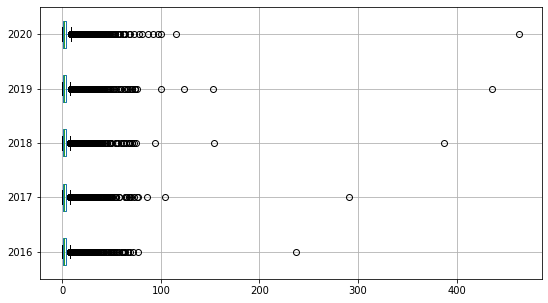

In [74]:
fig = selec[r5y].boxplot(vert=False)

Ainda há outlier, porém vamos mantê-los pois trata-se de periódicos de alto desempenho e verificaremos posteriormente se não irá interferir na predição.

In [75]:
selec.T

1      \
source_id                              21100404576   
journal                               2D Materials   
print_issn                                     NaN   
e_issn                                    20531583   
status                                      Active   
coverage                              2014-ongoing   
open_access                                      1   
type                                       journal   
publisher    Institute of Physics Publishing (IOP)   
2011                                           NaN   
2012                                           NaN   
2013                                           NaN   
2014                                           0.9   
2015                                           2.9   
2016                                           4.7   
2017                                           7.2   
2018                                           9.9   
2019                                          12.2   
2020                                          13.9   
sum                                           51.7   
mean                                          7.39   
std                                           4.49   
selec                                            1   

                                            2      \
source_id                             21100447128   
journal                                 3 Biotech   
print_issn                               2190572X   
e_issn                                   21905738   
status                                     Active   
coverage                       2014-ongoing, 2012   
open_access                                     1   
type                                      journal   
publisher    Springer International Publishing AG   
2011                                          NaN   
2012                                          NaN   
2013                                          NaN   
2014                                          NaN   
2015                                          1.2   
2016                                          1.1   
2017                                          1.8   
2018                                          2.8   
2019                                          3.2   
2020                                          3.5   
sum                                          13.6   
mean                                         2.27   
std                                          0.95   
selec                                           1   

                                              3      \
source_id                               21100779062   
journal      3D Printing and Additive Manufacturing   
print_issn                                 23297662   
e_issn                                     23297670   
status                                       Active   
coverage                               2014-ongoing   
open_access                                       1   
type                                        journal   
publisher                     Mary Ann Liebert Inc.   
2011                                            NaN   
2012                                            NaN   
2013                                            NaN   
2014                                            NaN   
2015                                            NaN   
2016                                            2.3   
2017                                            4.1   
2018                                            4.6   
2019                                            5.5   
2020                                            6.8   
sum                                            23.3   
mean                                           4.66   
std                                            1.49   
selec                                             1   

                                         5      \
source_id                          21100229836   
journal                            3D Research   
prin

## Calculo da taxa de crescimento e alvo

#### Taxa de crescimento anual composta (CAGR)

Uma taxa de crescimento anual composta (CAGR - Compound annual growth rate ) mede a taxa de retorno de um dado acrescimo numa variável durante um período de tempo, como 5 ou 10 anos. O CAGR também é chamado de taxa de retorno "suavizada" porque mede o crescimento de um valor como se tivesse aumentado a uma taxa constante em uma base composta anualmente.

Sua fórmula básica é mostrada como: = ((Valor Final / Valor Inicial) ^ (1 / Períodos) -1.



Período de cobertura: 5 anos

In [76]:
# teste
np.power(4.7/1.3, 1/(5-1))-1

0.3789185893472562

In [77]:
# Taxa de crescimento em 5 anos
selec['growth_rate'] = np.power((selec['2020']/selec['2016']), 1/(5-1))-1
selec.head(10).T

1   \
source_id                              21100404576   
journal                               2D Materials   
print_issn                                     NaN   
e_issn                                    20531583   
status                                      Active   
coverage                              2014-ongoing   
open_access                                      1   
type                                       journal   
publisher    Institute of Physics Publishing (IOP)   
2011                                           NaN   
2012                                           NaN   
2013                                           NaN   
2014                                           0.9   
2015                                           2.9   
2016                                           4.7   
2017                                           7.2   
2018                                           9.9   
2019                                          12.2   
2020                                          13.9   
sum                                           51.7   
mean                                          7.39   
std                                           4.49   
selec                                            1   
growth_rate                               0.311382   

                                               2   \
source_id                             21100447128   
journal                                 3 Biotech   
print_issn                               2190572X   
e_issn                                   21905738   
status                                     Active   
coverage                       2014-ongoing, 2012   
open_access                                     1   
type                                      journal   
publisher    Springer International Publishing AG   
2011                                          NaN   
2012                                          NaN   
2013                                          NaN   
2014                                          NaN   
2015                                          1.2   
2016                                          1.1   
2017                                          1.8   
2018                                          2.8   
2019                                          3.2   
2020                                          3.5   
sum                                          13.6   
mean                                         2.27   
std                                          0.95   
selec                                           1   
growth_rate                              0.335577   

                                                 3   \
source_id                               21100779062   
journal      3D Printing and Additive Manufacturing   
print_issn                                 23297662   
e_issn                                     23297670   
status                                       Active   
coverage                               2014-ongoing   
open_access                                       1   
type                                        journal   
publisher                     Mary Ann Liebert Inc.   
2011                                            NaN   
2012                                            NaN   
2013                                            NaN   
2014                                            NaN   
2015                                            NaN   
2016                                            2.3   
2017                                            4.1   
2018                                            4.6   
2019                                            5.5   
2020                                            6.8   
sum                                            23.3   
mean                                           4.66   
std                                            1.49   
selec                                             1   
growth_rate                                0.311279

In [78]:
# Alvo y com base na tx 5 anos
selec['target'] = np.where(selec['growth_rate'] < 0, selec['2020'], ((selec['2020']*selec['growth_rate']) + selec['2020']).round(2))
selec.head(10).T

1   \
source_id                              21100404576   
journal                               2D Materials   
print_issn                                     NaN   
e_issn                                    20531583   
status                                      Active   
coverage                              2014-ongoing   
open_access                                      1   
type                                       journal   
publisher    Institute of Physics Publishing (IOP)   
2011                                           NaN   
2012                                           NaN   
2013                                           NaN   
2014                                           0.9   
2015                                           2.9   
2016                                           4.7   
2017                                           7.2   
2018                                           9.9   
2019                                          12.2   
2020                                          13.9   
sum                                           51.7   
mean                                          7.39   
std                                           4.49   
selec                                            1   
growth_rate                               0.311382   
target                                       18.23   

                                               2   \
source_id                             21100447128   
journal                                 3 Biotech   
print_issn                               2190572X   
e_issn                                   21905738   
status                                     Active   
coverage                       2014-ongoing, 2012   
open_access                                     1   
type                                      journal   
publisher    Springer International Publishing AG   
2011                                          NaN   
2012                                          NaN   
2013                                          NaN   
2014                                          NaN   
2015                                          1.2   
2016                                          1.1   
2017                                          1.8   
2018                                          2.8   
2019                                          3.2   
2020                                          3.5   
sum                                          13.6   
mean                                         2.27   
std                                          0.95   
selec                                           1   
growth_rate                              0.335577   
target                                       4.67   

                                                 3   \
source_id                               21100779062   
journal      3D Printing and Additive Manufacturing   
print_issn                                 23297662   
e_issn                                     23297670   
status                                       Active   
coverage                               2014-ongoing   
open_access                                       1   
type                                        journal   
publisher                     Mary Ann Liebert Inc.   
2011                                            NaN   
2012                                            NaN   
2013                                            NaN   
2014                                            NaN   
2015                                            NaN   
2016                                            2.3   
2017                                            4.1   
2018                                            4.6   
2019                                            5.5   
2020                                            6.8   
sum                                            23.3   
mean                                           4.66   
std                                            1.49   

## Regressão Linear com scikit-learn

Scikit-learn é um módulo Python que integra uma ampla gama de algoritmos de aprendizado de máquina de última geração para problemas supervisionados e não supervisionados de média escala.

Este pacote se concentra em levar o aprendizado de máquina para não especialistas usando uma linguagem de alto nível de uso geral. A ênfase é colocada na facilidade de uso, desempenho, documentação e consistência da API. 

Possui dependências mínimas e é distribuído sob a licença BSD simplificada, incentivando seu uso em ambientes acadêmicos e comerciais.

A regressão linear austa um modelo linear com coeficientes w = (w1, …, wp) para minimizar a soma residual dos quadrados entre os alvos observados no conjunto de dados e os alvos previstos pela aproximação linear.

Vamos aplicá-lo ao nosso conjutno de dados, primeiramente separando somente as variáveis contínuas, ou seja, colunas citeScore de 2016 a 2020 e armazená-los no dataset "xdata" e depois derivaremos para o conjunto X exigido no modelo estatístico.

Para o atributo alvo (y) faremos a seleção diretamente do atributo "target" do conjunto "xdata".

In [79]:
# Filtra somente os indicadores para a predicao (2016 a 2020)
xdata = selec[r5y]
xdata.head()

2016  2017  2018  2019  2020
1   4.7   7.2   9.9  12.2  13.9
2   1.1   1.8   2.8   3.2   3.5
3   2.3   4.1   4.6   5.5   6.8
5   1.3   1.6   1.9   2.9   4.7
6   0.8   0.8   0.8   1.3   2.0

In [80]:
xdata.describe()

2016          2017          2018          2019          2020
count  19154.000000  19154.000000  19154.000000  19154.000000  19154.000000
mean       2.646512      2.785089      2.904077      3.062619      3.348314
std        4.174359      4.550014      5.008418      5.372141      5.674682
min        0.100000      0.100000      0.100000      0.100000      0.100000
25%        0.700000      0.700000      0.800000      0.800000      0.900000
50%        1.600000      1.700000      1.800000      2.000000      2.200000
75%        3.400000      3.500000      3.600000      3.800000      4.200000
max      237.400000    290.800000    387.200000    435.400000    463.200000

In [83]:
# Importação de bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [84]:
# Regressão Linear

# DataSet
X = xdata

# Alvo
y = selec['target']

# Separação de dados para treino e teste com partes 75|25
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instanciando e treinando o modelo
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)

# Realizando a predição
y_pred = linear_regression.predict(X_test)

### Métricas de avaliação do modelo

#### Importando as bibliotecas de métricas

In [85]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


In [86]:
# Métricas de avaliação
print("Regressão Linear")

# MAE - Erro Médio Absoluto
print("MAE:    ", mean_absolute_error(y_test, y_pred))

# MAPE
print("MAPE:   ", mean_absolute_percentage_error(y_test, y_pred))

# R2Score - métrica que mede a qualidade do modelo
print("R2:     ", r2_score(y_test, y_pred).round(4))

print("Acurácia na base de treinamento: {:.4f}".format(linear_regression.score(X_train, y_train)))
print("Acurácia na base de teste: {:.4f}".format(linear_regression.score(X_test, y_test)))

Regressão Linear
MAE:     0.2270793936565607
MAPE:    0.11460742311691667
R2:      0.9903
Acurácia na base de treinamento: 0.9891
Acurácia na base de teste: 0.9903


#### MAE - Erro médio absoluto

O erro médio absoluto, MAE (Mean Absolute Error), é calculado a partir da média dos erros absolutos e pode ser usada em séries temporais. Aqui medimos apenas a distância do valor real, independente de ser acima ou abaixo.
Nossa amostragem tem outliers, mas essa métrica é meno afetada por pontos extremos.
A saída MAE é um ponto flutuante não negativo. O melhor valor é 0.0.

Neste exemplo o MAE resultou em 0.22


#### MAPE - Erro percentual médio absoluto

A saída MAPE é um ponto flutuante não negativo. O melhor valor é 0,0. 
Mas observe que previsões ruins podem levar a valores MAPE arbitrariamente grandes, especialmente se alguns valores y_true estiverem muito próximos de zero. Observe que retornamos um valor grande em vez de inf quando y_true é zero.

Neste exemplo o MAPE resultou em 0.11

#### R² Score
Coeficiente de Determinação (R2 Score): um coeficiente de determinação R² varia entre 0 e 1 e expressa a quantidade da variância dos dados que é explicada pelo modelo linear.

Neste modelo R² = 0,99 é uma acurácia muito boa e significa que o modelo linear explica 99% da variância entre as variáveis dependente e independente.




In [87]:
X.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape, y_pred.shape

((19154, 5), (14365, 5), (4789, 5), (14365,), (4789,), (4789,))

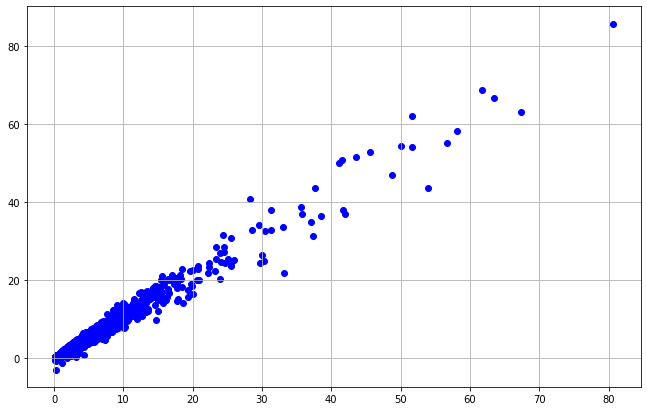

In [88]:
plt.rcParams['figure.figsize'] = (11,7)
plt.scatter(X_test['2020'], y_pred,  color=['blue'])
plt.grid()
plt.show()

Podemos deduzir deste gráfico que os valores preditos estão bem relacionados aos valores reais de indicadores de ano 2020.

Veja a tabela abaixo:

In [89]:
result = X_test.copy()
result['pred'] = y_pred.round(1)
result['diff'] = result['pred']-result['2020']
result.head(10)

2016  2017  2018  2019  2020  pred  diff
22604   6.0   6.9   7.6   8.0   8.8  10.0   1.2
10472   0.1   0.1   0.4   0.4   0.5   0.8   0.3
25601   0.3   0.6   0.7   0.7   0.4   0.6   0.2
15859   0.3   0.4   0.5   0.5   0.7   0.9   0.2
22050   1.8   1.3   1.4   1.3   2.1   2.2   0.1
19546   5.8   5.6   5.8   6.4   7.7   8.5   0.8
18087   1.7   1.2   1.9   3.1   4.4   5.7   1.3
25697   1.6   1.8   1.8   1.7   2.0   2.2   0.2
10140   2.4   2.8   3.2   2.8   2.9   3.1   0.2
3081    4.3   3.7   3.8   4.0   4.8   4.9   0.1

### Cross Validation

Vamos avançar agora testando outros modelo junto com a técnica de validação cruzada e aplicando novamente os modelos LinearRegression e para comparação dos modelos Ridge e Lasso e ajustes de hiperparâmetros, caso necessário.


#### Normalização dos dados

A normalização é uma técnica geralmente aplicada como parte da preparação de dados para o aprendizado de máquina. O objetivo da normalização é mudar os valores das colunas numéricas no conjunto de dados para usar uma escala comum, sem distorcer as diferenças nos intervalos de valores nem perder informações. A normalização também é necessária para alguns algoritmos para modelar os dados corretamente.

Junto a esses modelos vamos testar 3 técnicas de normalização de dados utilizando bibliotecas do sklean:

* MinMaxScaler

* PolynomialFeatures

* QuantileTransformer


### Linear Regression x Ridge

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, QuantileTransformer


# DataSet
X = xdata

# Alvo
y = selec['target']

# Normalizacao - selecinar para testar
# X = MinMaxScaler().fit_transform(X)
# X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
X = QuantileTransformer().fit_transform(X)   

# conjunto de modelos
models = [LinearRegression(), Ridge()]

# score de cada modelo
models_scores = []


def showresults(model, X_test, y_train, y_test, val_scores):
    print('Média: {:.5}| Desvio: {:.5}'.format(np.mean(val_scores), np.std(val_scores)))
    print("R2:   ", r2_score(y_test, y_pred).round(4))
    print("Score na base de treinamento: {:.5}".format(model.score(X_train, y_train)))
    print("Score na base de teste: {:.5}\n".format(model.score(X_test, y_test)))
    


# Validação Cruzada para cada modelo
for model in models:
    model_name = type(model).__name__ # Nome do Modelo
   
    # Define alphas para Ridge
    if model_name == 'Ridge':
        alpha_list = [1, 10, 0.1]
       
    # Treina o modelo
    if model_name == 'LinearRegression':
        model.fit(X_train, y_train)
        print(model_name)
        print('-'*len(model_name))
        # Valida o modelo com 5 dobras (cv=5)
        val_scores = cross_val_score(model, X_train, y_train, cv=5)
        models_scores.append(val_scores)
        showresults(model, X_test, y_train, y_test, val_scores)
    else:
        for a in alpha_list:
            model.set_params(alpha=a).fit(X_train, y_train)
            print(model_name, model.get_params()['alpha'])
            print('-'*len(model_name))
            # Valida o modelo com 5 dobras (cv=5)
            val_scores = cross_val_score(model, X_train, y_train, cv=5)
            models_scores.append(val_scores)
            showresults(model, X_test, y_train, y_test, val_scores)


LinearRegression
----------------
Média: 0.98759| Desvio: 0.0020212
R2:    0.9903
Score na base de treinamento: 0.98909
Score na base de teste: 0.9903

Ridge 1
-----
Média: 0.98759| Desvio: 0.0020213
R2:    0.9903
Score na base de treinamento: 0.98909
Score na base de teste: 0.9903

Ridge 10
-----
Média: 0.98759| Desvio: 0.0020225
R2:    0.9903
Score na base de treinamento: 0.98909
Score na base de teste: 0.99031

Ridge 0.1
-----
Média: 0.98759| Desvio: 0.0020212
R2:    0.9903
Score na base de treinamento: 0.98909
Score na base de teste: 0.9903



In [91]:
# Ridge 

# DataSet
X = xdata

# Alvo
y = selec['target']

# Separação de dados para treino e teste com partes 75|25
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instanciando e treinando o modelo
ridge = Ridge()
ridge.set_params(alpha=1).fit(X_train, y_train)

# Realizando a predição
y_pred = ridge.predict(X_test)

In [92]:
# Métricas de avaliação
print("Regressão Linear")

# MAE - Erro Médio Absoluto
print("MAE:    ", mean_absolute_error(y_test, y_pred))

# MAPE
print("MAPE:   ", mean_absolute_percentage_error(y_test, y_pred))

# R2Score - métrica que mede a qualidade do modelo
print("R2:     ", r2_score(y_test, y_pred).round(4))

print("Acurácia na base de treinamento: {:.4f}".format(linear_regression.score(X_train, y_train)))
print("Acurácia na base de teste: {:.4f}".format(linear_regression.score(X_test, y_test)))

Regressão Linear
MAE:     0.22705905581154448
MAPE:    0.11460008468718465
R2:      0.9903
Acurácia na base de treinamento: 0.9891
Acurácia na base de teste: 0.9903


In [93]:
plt.rcParams['figure.figsize'] = (11,7)
plt.scatter(X_test['2018'], y_pred, color=['orange'])
plt.grid()
plt.title("Teste com o modelo Ridge alpha 1")
plt.show()

In [94]:
result = X_test.copy()
result['pred'] = y_pred.round(1)
result['diff'] = result['pred']-result['2020']
result.head(10)

2016  2017  2018  2019  2020  pred  diff
22604   6.0   6.9   7.6   8.0   8.8  10.0   1.2
10472   0.1   0.1   0.4   0.4   0.5   0.8   0.3
25601   0.3   0.6   0.7   0.7   0.4   0.6   0.2
15859   0.3   0.4   0.5   0.5   0.7   0.9   0.2
22050   1.8   1.3   1.4   1.3   2.1   2.2   0.1
19546   5.8   5.6   5.8   6.4   7.7   8.5   0.8
18087   1.7   1.2   1.9   3.1   4.4   5.7   1.3
25697   1.6   1.8   1.8   1.7   2.0   2.2   0.2
10140   2.4   2.8   3.2   2.8   2.9   3.1   0.2
3081    4.3   3.7   3.8   4.0   4.8   4.9   0.1

### Ridge x Lasso

In [95]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import QuantileTransformer

# DataSet
X = xdata

# Alvo
y = selec['target']

# Normalizacao - selecinar para testar
# X = MinMaxScaler().fit_transform(X)
# X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
X = QuantileTransformer().fit_transform(X)   

# conjunto de modelos
models = [Ridge(), Lasso()]

# score de cada modelo
models_scores = []


def showresults(model, X_test, y_train, y_test, val_scores):
    print('Média: {:.5}| Desvio: {:.5}'.format(np.mean(val_scores), np.std(val_scores)))
    print("R2:   ", r2_score(y_test, y_pred).round(4))
    print("Score na base de treinamento: {:.5}".format(model.score(X_train, y_train)))
    print("Score na base de teste: {:.5}\n".format(model.score(X_test, y_test)))
    


# Validação Cruzada para cada modelo
for model in models:
    model_name = type(model).__name__ # Nome do Modelo
   
    # Define alphas para Ridge e Lasso
    if model_name == 'Ridge':
        alpha_list = [1, 10, 0.1]
    if model_name == 'Lasso':
        alpha_list = [1, 0.01, .0001]
 
       
    # Treina o modelo
    if model_name == 'Ridge':
        for a in alpha_list:
            model.fit(X_train, y_train)
            print(model_name)
            print('-'*len(model_name))
            # Valida o modelo com 5 dobras (cv=5)
            val_scores = cross_val_score(model, X_train, y_train, cv=5)
            models_scores.append(val_scores)
            showresults(model, X_test, y_train, y_test, val_scores)
    else:
        for a in alpha_list:
            model.set_params(alpha=a, max_iter=10000).fit(X_train, y_train)
            print(model_name, model.get_params()['alpha'])
            print('-'*len(model_name))
            # Valida o modelo com 5 dobras (cv=5)
            val_scores = cross_val_score(model, X_train, y_train, cv=5)
            models_scores.append(val_scores)
            showresults(model, X_test, y_train, y_test, val_scores)


Ridge
-----
Média: 0.98759| Desvio: 0.0020213
R2:    0.9903
Score na base de treinamento: 0.98909
Score na base de teste: 0.9903

Ridge
-----
Média: 0.98759| Desvio: 0.0020213
R2:    0.9903
Score na base de treinamento: 0.98909
Score na base de teste: 0.9903

Ridge
-----
Média: 0.98759| Desvio: 0.0020213
R2:    0.9903
Score na base de treinamento: 0.98909
Score na base de teste: 0.9903

Lasso 1
-----
Média: 0.97089| Desvio: 0.0073634
R2:    0.9903
Score na base de treinamento: 0.97082
Score na base de teste: 0.98056

Lasso 0.01
-----
Média: 0.98786| Desvio: 0.0019987
R2:    0.9903
Score na base de treinamento: 0.98907
Score na base de teste: 0.99064

Lasso 0.0001
-----
Média: 0.98758| Desvio: 0.0020218
R2:    0.9903
Score na base de treinamento: 0.98909
Score na base de teste: 0.9903



In [96]:
# Lasso 0.01 

# DataSet
X = xdata

# Alvo
y = selec['target']

# Separação de dados para treino e teste com partes 75|25
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instanciando e treinando o modelo
lasso = Lasso()
lasso.set_params(alpha=0.01, max_iter=100000).fit(X_train, y_train)

# Realizando a predição
y_pred = ridge.predict(X_test)

In [97]:
plt.rcParams['figure.figsize'] = (11,7)
plt.scatter(X_test['2019'], y_pred, color=['red'])
plt.grid()
plt.title("Teste com o modelo Lasso alpha 0.01")
plt.show()

In [98]:
result = X_test.copy()
result['pred'] = y_pred.round(1)
result['diff'] = result['pred']-result['2020']
result.head(10)

2016  2017  2018  2019  2020  pred  diff
22604   6.0   6.9   7.6   8.0   8.8  10.0   1.2
10472   0.1   0.1   0.4   0.4   0.5   0.8   0.3
25601   0.3   0.6   0.7   0.7   0.4   0.6   0.2
15859   0.3   0.4   0.5   0.5   0.7   0.9   0.2
22050   1.8   1.3   1.4   1.3   2.1   2.2   0.1
19546   5.8   5.6   5.8   6.4   7.7   8.5   0.8
18087   1.7   1.2   1.9   3.1   4.4   5.7   1.3
25697   1.6   1.8   1.8   1.7   2.0   2.2   0.2
10140   2.4   2.8   3.2   2.8   2.9   3.1   0.2
3081    4.3   3.7   3.8   4.0   4.8   4.9   0.1

### Validation Predict

Neste exercício ficaremos com o modelo de Regressão Linear

In [100]:
from sklearn.model_selection import cross_val_predict

# DataSet
X = xdata

# Alvo
y = selec['target']

# Treinamento do modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instanciando e treinando o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predição com validação cruzada k-fol=5
pred = cross_val_predict(model, X, y, cv=5)


In [101]:
from sklearn import metrics
accuracy = metrics.r2_score(y, pred)

print("Cross-Predicted Accuracy:", accuracy)

Cross-Predicted Accuracy: 0.9845502814578131


In [102]:
val_scores

array([0.9884008 , 0.99010438, 0.98772664, 0.98775786, 0.98392771])

In [103]:
pred.max()

590.4322233020962

In [104]:
fig, ax = plt.subplots()
ax.scatter(y, pred, edgecolors="blue")
ax.plot([y.min(), y.max()], [y.min(), y.max()], color='black', lw=1)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
ax.grid()
plt.show()

### Junção dos resultados

Vamos juntar os resultados obtidos no DataFrame original e depois identificar os periódicos presentes na coleção SciELO

In [105]:
result = selec.copy()
result.T

1      \
source_id                              21100404576   
journal                               2D Materials   
print_issn                                     NaN   
e_issn                                    20531583   
status                                      Active   
coverage                              2014-ongoing   
open_access                                      1   
type                                       journal   
publisher    Institute of Physics Publishing (IOP)   
2011                                           NaN   
2012                                           NaN   
2013                                           NaN   
2014                                           0.9   
2015                                           2.9   
2016                                           4.7   
2017                                           7.2   
2018                                           9.9   
2019                                          12.2   
2020                                          13.9   
sum                                           51.7   
mean                                          7.39   
std                                           4.49   
selec                                            1   
growth_rate                               0.311382   
target                                       18.23   

                                            2      \
source_id                             21100447128   
journal                                 3 Biotech   
print_issn                               2190572X   
e_issn                                   21905738   
status                                     Active   
coverage                       2014-ongoing, 2012   
open_access                                     1   
type                                      journal   
publisher    Springer International Publishing AG   
2011                                          NaN   
2012                                          NaN   
2013                                          NaN   
2014                                          NaN   
2015                                          1.2   
2016                                          1.1   
2017                                          1.8   
2018                                          2.8   
2019                                          3.2   
2020                                          3.5   
sum                                          13.6   
mean                                         2.27   
std                                          0.95   
selec                                           1   
growth_rate                              0.335577   
target                                       4.67   

                                              3      \
source_id                               21100779062   
journal      3D Printing and Additive Manufacturing   
print_issn                                 23297662   
e_issn                                     23297670   
status                                       Active   
coverage                               2014-ongoing   
open_access                                       1   
type                                        journal   
publisher                     Mary Ann Liebert Inc.   
2011                                            NaN   
2012                                            NaN   
2013                                            NaN   
2014                                            NaN   
2015                                            NaN   
2016                                            2.3   
2017                                            4.1   
2018                                            4.6   
2019                                            5.5   
2020                                            6.8   
sum                                            23.3   
mean                                           4.66   
std                                            1.49

In [106]:
# Adiciona a predição em nova coluna e novo DataFrame
result['pred'] = pred.round(2)
result['diff'] = result['pred']-result['2020']
result.head(10).T

1   \
source_id                              21100404576   
journal                               2D Materials   
print_issn                                     NaN   
e_issn                                    20531583   
status                                      Active   
coverage                              2014-ongoing   
open_access                                      1   
type                                       journal   
publisher    Institute of Physics Publishing (IOP)   
2011                                           NaN   
2012                                           NaN   
2013                                           NaN   
2014                                           0.9   
2015                                           2.9   
2016                                           4.7   
2017                                           7.2   
2018                                           9.9   
2019                                          12.2   
2020                                          13.9   
sum                                           51.7   
mean                                          7.39   
std                                           4.49   
selec                                            1   
growth_rate                               0.311382   
target                                       18.23   
pred                                         18.92   
diff                                          5.02   

                                               2   \
source_id                             21100447128   
journal                                 3 Biotech   
print_issn                               2190572X   
e_issn                                   21905738   
status                                     Active   
coverage                       2014-ongoing, 2012   
open_access                                     1   
type                                      journal   
publisher    Springer International Publishing AG   
2011                                          NaN   
2012                                          NaN   
2013                                          NaN   
2014                                          NaN   
2015                                          1.2   
2016                                          1.1   
2017                                          1.8   
2018                                          2.8   
2019                                          3.2   
2020                                          3.5   
sum                                          13.6   
mean                                         2.27   
std                                          0.95   
selec                                           1   
growth_rate                              0.335577   
target                                       4.67   
pred                                          4.8   
diff                                          1.3   

                                                 3   \
source_id                               21100779062   
journal      3D Printing and Additive Manufacturing   
print_issn                                 23297662   
e_issn                                     23297670   
status                                       Active   
coverage                               2014-ongoing   
open_access                                       1   
type                                        journal   
publisher                     Mary Ann Liebert Inc.   
2011                                            NaN   
2012                                            NaN   
2013                                            NaN   
2014                                            NaN   
2015                                            NaN   
2016                                            2.3   
2017                                            4.1   
2018                                            4.6   
2019                                            5.5   
2020 

In [107]:
# Verificação de um periódico brasileiro de alto desempenho 
result[result['print_issn']=='00740276']

source_id                             journal print_issn    e_issn  \
17870      15205  Memorias do Instituto Oswaldo Cruz   00740276  16788060   

       status                                  coverage  open_access     type  \
17870  Active  1980-ongoing, 1974-1976, 1951-1971, 1948            0  journal   

                   publisher  2011  ...  2019  2020   sum  mean   std  selec  \
17870  Fundacao Oswaldo Cruz   3.3  ...   4.1   4.0  36.8  3.68  0.74      1   

       growth_rate  target  pred  diff  
17870     0.012906    4.05  4.14  0.14  

[1 rows x 27 columns]

### Conclusão
A consistencia dos dados, no caso dos indicadores e a estratégia de seleção garantindo dados presentes nos 5 anos de cobertura e periódicos relevantes (ativos e com impacto) fez como que o desempenho dos modelos testados foram eficientes e semelhantes entre si.

Vamos então concatenar os periódicos da base SciELO e assim poder fazer novas analises neste contexto.

#### Carga dos dados de periódicos SciELO

In [109]:
scielo = pd.read_csv('data/scielo_scopus.csv')
scielo.T

0    \
source_id                                     4700153508   
issn_scielo                                    0101-8108   
journal      Revista de Psiquiatria do Rio Grande do Sul   
country                                           Brazil   

                                 1                                2    \
source_id                 5600152949                            28600   
issn_scielo                0034-7701                        0102-261X   
journal      Revista de Antropologia  Revista Brasileira de Geofísica   
country                       Brazil                           Brazil   

                                                      3    \
source_id                                           22359   
issn_scielo                                     1516-9332   
journal      Revista Brasileira de Ciências Farmacêuticas   
country                                            Brazil   

                                                    4    \
source_id                                        145183   
issn_scielo                                   0104-5687   
journal      Pró-Fono Revista de Atualização Científica   
country                                          Brazil   

                                                           5    \
source_id                                                92906   
issn_scielo                                          0103-1759   
journal      Sba: Controle & Automação Sociedade Brasileira...   
country                                                 Brazil   

                                        6                               7    \
source_id                        4500151533                      5000157108   
issn_scielo                       0101-8175                       0101-3122   
journal      Revista Brasileira de Zoologia  Revista Brasileira de Sementes   
country                              Brazil                          Brazil   

                                                          8    \
source_id                                         21100197175   
issn_scielo                                         2179-6491   
journal      Jornal da Sociedade Brasileira de Fonoaudiologia   
country                                                Brazil   

                                9    ...                    888  \
source_id               19900193269  ...             5300152520   
issn_scielo               1980-6523  ...              0214-7823   
journal      Revista Odonto Ciência  ...  Papeles del Psicólogo   
country                      Brazil  ...                  Spain   

                         889                               890           891  \
source_id        12100154802                             15103   21100944564   
issn_scielo        2675-5475                         2604-1227     2415-0525   
journal      Soils and Rocks  Revista mexicana de oftalmología    Communitas   
country               Brazil                            Mexico  South Africa   

                            892  \
source_id            5800170623   
issn_scielo           1984-8234   
journal      Filosofia Unisinos   
country                  Brazil   

                                                           893  \
source_id                                          21100197926   
issn_scielo                                          1646-2890   
journal      Revista Portuguesa de Estomatologia, Medicina ...   
country                                               Portugal   

                             894  \
source_id                  21030   
issn_scielo            2444-054X   
journal      Cirugía y cirujanos   
country                   Mexico   

                                                       895  \
source_id                                      21100854846   
issn_scielo                                      2524-177X   
journal      Revista médica del Hospital General de México   
country                                             Mexico

##### Junção de DataSets

In [111]:
result = pd.merge(result, scielo, how='left', on='source_id')
result

source_id                                          journal_x  \
0      21100404576                                       2D Materials   
1      21100447128                                          3 Biotech   
2      21100779062             3D Printing and Additive Manufacturing   
3      21100229836                                        3D Research   
4      19700200922              3L: Language, Linguistics, Literature   
...            ...                                                ...   
19151  21100403905                                              Zutot   
19152        24017  ZWF Zeitschrift fuer Wirtschaftlichen Fabrikbe...   
19153        28883                                              Zygon   
19154        19073                                             Zygote   
19155  19700173167  Zywnosc. Nauka. Technologia. Jakosc/Food. Scie...   

      print_issn    e_issn  status                 coverage  open_access  \
0            NaN  20531583  Active             2014-ongoing            1   
1       2190572X  21905738  Active       2014-ongoing, 2012            1   
2       23297662  23297670  Active             2014-ongoing            1   
3            NaN  20926731  Active             2010-ongoing            1   
4       01285157       NaN  Active             2008-ongoing            0   
...          ...       ...     ...                      ...          ...   
19151   15717283  18750214  Active  2008-ongoing, 2001-2004            1   
19152   09470085       NaN  Active             1995-ongoing            1   
19153   05912385  14679744  Active             1966-ongoing            1   
19154   09671994  14698730  Active             1993-ongoing            1   
19155   14256959       NaN  Active             2009-ongoing            1   

          type                                publisher  2011  ...  mean  \
0      journal    Institute of Physics Publishing (IOP)   NaN  ...  7.39   
1      journal     Springer International Publishing AG   NaN  ...  2.27   
2      journal                    Mary Ann Liebert Inc.   NaN  ...  4.66   
3      journal        Springer Science + Business Media   2.5  ...  2.34   
4      journal  Penerbit Universiti Kebangsaan Malaysia   0.2  ...  0.84   
...        ...                                      ...   ...  ...   ...   
19151  journal                                    Brill   NaN  ...  0.12   
19152  journal                   Walter de Gruyter GmbH   NaN  ...  0.72   
19153  journal                Blackwell Publishing Inc.   1.1  ...  1.42   
19154  journal               Cambridge University Press   2.1  ...  2.00   
19155  journal     Polish Society of Food Technologists   0.1  ...  0.43   

        std  selec  growth_rate  target   pred  diff  issn_scielo  journal_y  \
0      4.49      1     0.311382   18.23  18.92  5.02          NaN        NaN   
1      0.95      1     0.335577    4.67   4.80  1.30          NaN        NaN   
2      1.49      1     0.311279    8.92   9.09  2.29          NaN        NaN   
3      0.99      1     0.378919    6.48   6.38  1.68          NaN        NaN   
4      0.49      1     0.257433    2.51   2.59  0.59          NaN        NaN   
...     ...    ...          ...     ...    ...   ...          ...        ...   
19151  0.07      1     0.000000    0.10   0.19  0.09          NaN        NaN   
19152  0.17      1    -0.085309    0.70   0.65 -0.05          NaN        NaN   
19153  0.19      1    -0.018356    1.30   1.23 -0.07          NaN        NaN   
19154  0.44      1     0.160298    3.36   3.58  0.68          NaN        NaN   
19155  0.13      1     0.046635    0.63   0.66  0.06          NaN        NaN   

       country  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
...        ...  
19151      NaN  
19152      NaN  
19153      NaN  
19154      NaN  
19155      NaN  

[19156 rows x 30 columns]

In [112]:
# Verificação de um periódico brasileiro de alto desempenho 
result[result['print_issn']=='00740276'].T

13376
source_id                                       15205
journal_x          Memorias do Instituto Oswaldo Cruz
print_issn                                   00740276
e_issn                                       16788060
status                                         Active
coverage     1980-ongoing, 1974-1976, 1951-1971, 1948
open_access                                         0
type                                          journal
publisher                       Fundacao Oswaldo Cruz
2011                                              3.3
2012                                              3.8
2013                                              2.6
2014                                              2.8
2015                                              2.9
2016                                              3.8
2017                                              4.5
2018                                                5
2019                                              4.1
2020                                                4
sum                                              36.8
mean                                             3.68
std                                              0.74
selec                                               1
growth_rate                                 0.0129059
target                                           4.05
pred                                             4.14
diff                                             0.14
issn_scielo                                 0074-0276
journal_y          Memórias do Instituto Oswaldo Cruz
country                                        Brazil

In [115]:
scielo_scopus = result[result['issn_scielo'].notnull() == True]
scielo_scopus

source_id                    journal_x print_issn    e_issn  status  \
114    19700202712               Acta Academica   05872405       NaN  Active   
120          65755              Acta Agronomica   01202812       NaN  Active   
122          18748               Acta Amazonica   00445967       NaN  Active   
136    10600153355               Acta Bioethica   07175906  1726569X  Active   
137    17600155203    Acta Biologica Colombiana   0120548X       NaN  Active   
...            ...                          ...        ...       ...     ...   
18728  19700170837                        Vitae   01214004       NaN  Active   
18737  21100264819                  Vniversitas   00419060  20111711  Active   
18784        19375                   Water S.A.   03784738  18167950  Active   
18810        20856  West Indian Medical Journal   00433144  23095830  Active   
19132  19700201507                     Zoologia   19844670  19844689  Active   

                 coverage  open_access     type  \
114          2009-ongoing            0  journal   
120    2012-ongoing, 1968            0  journal   
122    2006-ongoing, 1979            0  journal   
136          2007-ongoing            0  journal   
137          2008-ongoing            0  journal   
...                   ...          ...      ...   
18728        2009-ongoing            0  journal   
18737        2012-ongoing            1  journal   
18784        1976-ongoing            0  journal   
18810        1954-ongoing            1  journal   
19132        2009-ongoing            0  journal   

                                               publisher  2011  ...  mean  \
114                                Sun Media Corporation   0.1  ...  0.32   
120                     Universidad Nacional De Colombia   NaN  ...  0.33   
122         Instituto Nacional de Pesquisas da Amazonica   0.7  ...  1.27   
136    Universidad de Chile - Centro Interdisciplinar...   0.2  ...  0.27   
137                     Universidad Nacional de Colombia   0.3  ...  0.60   
...                                                  ...   ...  ...   ...   
18728                           Universidad de Antioquia   0.3  ...  0.37   
18737                   Pontificia Universidad Javeriana   NaN  ...  0.10   
18784                          Water Research Commission   1.6  ...  1.72   
18810                      University of the West Indies   0.7  ...  0.69   
19132                   Sociedade Brasileira de Zoologia   0.9  ...  1.34   

        std  selec  growth_rate  target  pred  diff  issn_scielo  \
114    0.16      1     0.136219    0.57  0.58  0.08    2415-0479   
120    0.31      1     0.351200    1.35  1.35  0.35    0120-2812   
122    0.34      1     0.036423    1.55  1.68  0.18    0044-5967   
136    0.08      1     0.189207    0.48  0.50  0.10    1726-569X   
137    0.33      1     0.033946    0.83  0.76 -0.04    0120-548X   
...     ...    ...          ...     ...   ...   ...          ...   
18728  0.21      1     0.565085    0.94  0.88  0.28    0121-4004   
18737  0.07      1     0.189207    0.24  0.32  0.12    0041-9060   
18784  0.17      1     0.054248    2.21  2.29  0.19    1816-7950   
18810  0.34      1    -0.319625    0.30 -0.17 -0.47    0043-3144   
19132  0.20      1     0.053281    1.69  1.75  0.15    1984-4670   

                         journal_y       country  
114                 Acta Academica  South Africa  
120                Acta Agronómica      Colombia  
122                 Acta Amazonica        Brazil  
136                 Acta bioethica         Chile  
137      Acta Biológica Colombiana      Colombia  
...                            ...           ...  
18728                        Vitae      Colombia  
18737                  Vniversitas      Colombia  
18784                     Water SA  South Africa  
18810  West Indian Medical Journal       Jamaica  
19132          Zoologia (Curitiba)        Brazil  

[608 rows x 30 columns]

In [131]:
countries = scielo_scopus.groupby('country').count()[['journal_x']]
countries.reset_index()
countries

journal_x
country                 
Argentina             26
Brazil               224
Chile                 64
Colombia              72
Costa Rica             2
Cuba                  17
Italy                  1
Jamaica                1
Mexico                80
Peru                   6
Portugal              17
South Africa          40
Spain                 40
Switzerland            1
United States          2
Uruguay                1
Venezuela             14

In [146]:
plt.rcParams['figure.figsize'] = (12, 9)
fig = countries[::-1].plot.barh(y='journal_x')
fig.set_title('Distribuição de periódicos SciELO indexados na base Scopus por país');
fig.set_ylabel('países');
fig.set_xlabel('periódicos');
fig.grid();